In [1]:
# install necessary libraries 
!pip install spacy
!pip install wordcloud
!pip install NLTK
!python -m spacy download en
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 2.8 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 636.8/636.8 kB 3.1 MB/s eta 0:00:00


In [2]:
pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import seaborn as sn 
from matplotlib.pyplot import imread
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import re
import string
from nltk import tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import Word
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS

In [4]:
import pandas as pd 
import seaborn as sn 
from matplotlib.pyplot import imread
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import re
import string
from nltk import tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import Word
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

True

In [8]:
df=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
df.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [10]:
df.rename({'Text':'tweets'},axis = 1,inplace=True)
df.head()

,tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [12]:
df.isna().sum()

tweets    0
dtype: int64

In [13]:
df = [tweets.strip() for tweets in df.tweets]
df = [tweets for tweets in df if tweets]
df[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [14]:
#joining the list into one string or text 
text = ' '.join(df)
text[0:100]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you trie'

In [15]:
#remove twitter user handle names  from a given twitter text 
tknzr = TweetTokenizer(strip_handles=True)
tweets_token = tknzr.tokenize(text)
tweets_token[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

In [16]:
#again joining the list 
tweets_token_text = ' '.join(tweets_token)
tweets_token_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview'

In [17]:
no_punc_text = tweets_token_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [18]:
no_url_text = re.sub(r'http\S+','',no_punc_text)
no_url_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [19]:
text_tokens = word_tokenize(no_url_text)
text_tokens[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

In [20]:
#tokens count 
len(text_tokens)

17847

In [22]:
my_stop_words = stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens[0:10]

['alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'Great',
 'interview']

In [23]:
#normalize the data 
lower_words = [Text.lower() for Text in no_stop_tokens]
lower_words[0:10]

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview']

In [24]:
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word)for word in lower_words]
stemmed_tokens[0:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview']

In [25]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
doc[0:10]

alien ray tracing cyberpunk hdr nextlevel have tried great interview

In [26]:
lemmas = [token.lemma_ for token in doc]
lemmas[0:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview']

In [27]:
clean_tweets = ' '.join(lemmas)
clean_tweets[0:500]

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypt'

In [28]:
#feature extraction
cv = CountVectorizer()
X = cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'alien': 194, 'ray': 2347, 'trace': 3011, 'cyberpunk': 767, 'hdr': 1358, 'nextlevel': 1960, 'have': 1353, 'try': 3042, 'great': 1305, 'interview': 1556, 'doge': 890, 'underestimate': 3175, 'congratulation': 675, 'tesla': 2916, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1640, 'year': 3391, 'now': 1988, 'next': 1959, 'even': 1031, 'happy': 1340, 'new': 1957, 'ox': 2089, 'frodo': 1207, 'underdoge': 3174, 'all': 197, 'thought': 2953, 'would': 3377, 'fail': 1091, 'himself': 1402, 'haha': 1328, 'thank': 2927, 'indeed': 1497, 'tweet': 3057, 'definitely': 804, 'represent': 2413, 'realworld': 2362, 'time': 2969, 'allocation': 199, 'the': 2932, 'entertaining': 1001, 'outcome': 2068, 'likely': 1695, 'just': 1598, 'send': 2556, 'agree': 179, 'clubhouse': 613, 'it': 1575, 'get': 1266, 'real': 2357, 'buy': 502, 'dogecoin': 892, 'lil': 1696, 'toddler': 2981, 'hodler': 1408, 'he': 1359, 'issue': 1574, 'sentencing': 2561, 'seem': 2548, 'bit': 418, 'high': 1393, 'fix': 1152, 'please': 218

In [29]:
print(X.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(X.toarray().shape)

(11562, 3411)


In [31]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [32]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
#fitting our term frequency- inverse document frequency vectorizer
tfidfv_ngram_max_feat = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram = tfidfv_ngram_max_feat.fit_transform(lemmas)
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


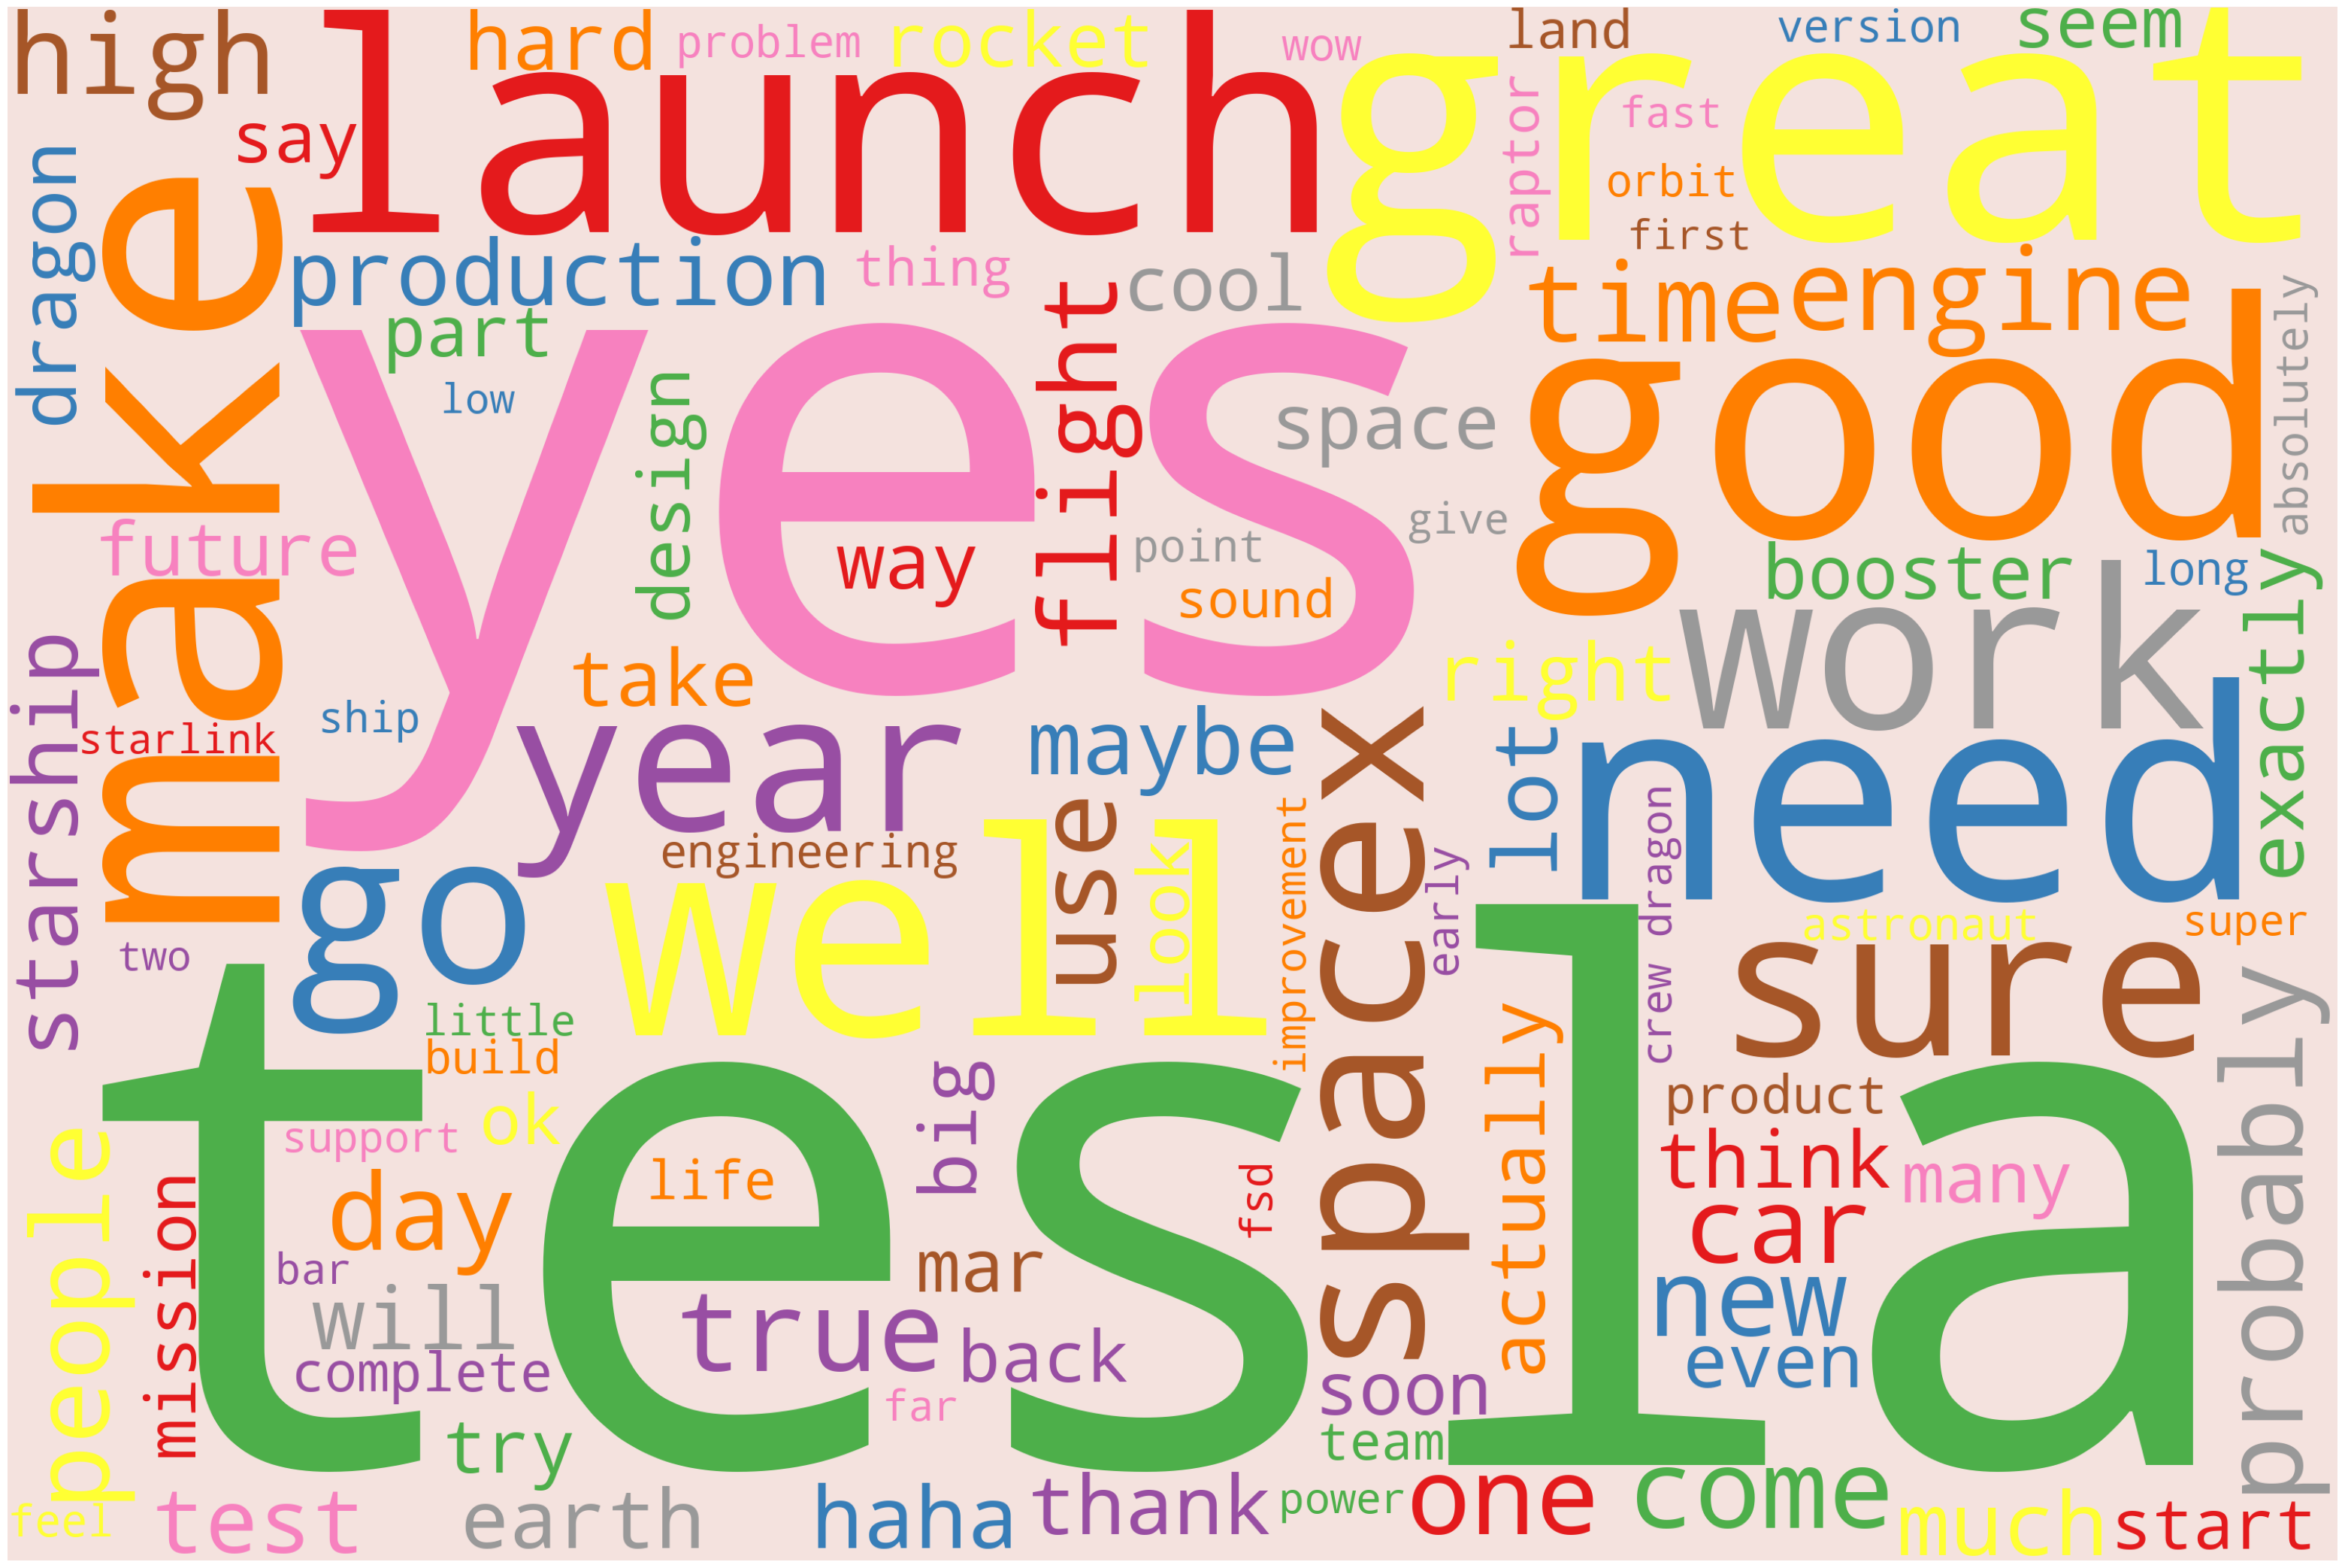

In [34]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')

wordcloud = WordCloud(width= 3000, height= 2000,background_color='#F4E2DE',max_words=100,
                     colormap='Set1',stopwords=STOPWORDS,contour_color='black',contour_width=2).generate(clean_tweets)
plot_cloud(wordcloud)

In [35]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter=True)

In [36]:
#printing position of words 
for token in doc_block[0:20]:
    print(token,token.pos_)

alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV


In [37]:
#filtering only nouns , verbs and Adjectives only
nouns_verbs_adj = [token.text for token in doc_block if token.pos_ in('NOUN','VERB','ADJECTIVE')]
print(nouns_verbs_adj[100:200])

['time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'start', 'engine', 'shut']


In [38]:
cv = CountVectorizer()
X2 = cv.fit_transform(nouns_verbs_adj)
sum_words = X2.sum(axis = 0)

words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:11] 

,word,count
0,tesla,76
1,make,64
2,launch,62
3,year,49
4,work,49
5,need,47
6,go,43
7,come,42
8,day,38
9,get,37


<AxesSubplot:title={'center':'top 10 verbs,adjectives and nouns'}, xlabel='word'>

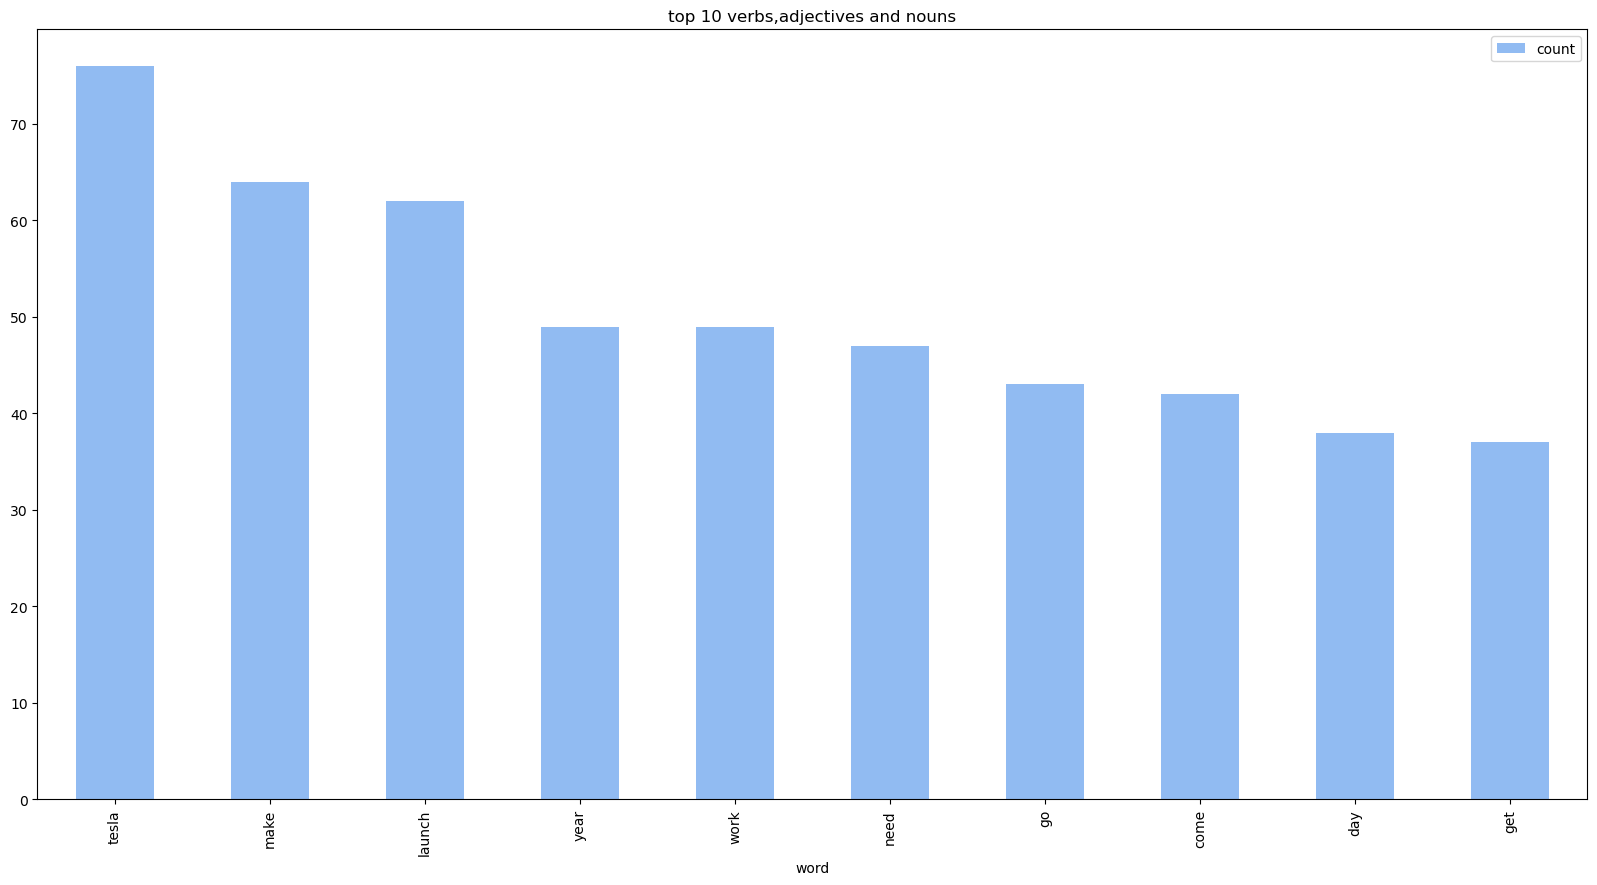

In [40]:
#visualizing our results on barplot 
wd_df[0:10].plot.bar(x = 'word',figsize =(20,10),title = 'top 10 verbs,adjectives and nouns',color = '#91BBF2')

In [41]:
#breaking tweets into sentences
sentences = tokenize.sent_tokenize(' '.join(df))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [42]:
#storing sentences into dataframe
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...
